<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" alt="alt text" width="400" height="100">


<h2>Introduction</h2>
For this unit, we will be using Pytorch, a powerful and widely used Deep Learning framework that lets us create larger and more complicated networks, use complicated loss functions, and train with more complicated training regimes, etc.

<h3> Installing PyTorch and importing the required libraries </h3>
Before we start, PyTorch need to be installed from the official website (https://pytorch.org/get-started/locally/)<br>
Pytorch has two main modules that we'll be using, torch and torchvision<br>
torch contains most of the Deep Learning functionalities while torchvision contains many computer vision functions designed to work in hand with torch

In [ ]:
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<h3> The Pytorch Tensor </h3>
As we've already explored the "Tensor" is a useful concept and is useful in Machine Learning.<br>

In [ ]:
# Create some "Matrices" as lists of lists

w = [[1, 1, 1],
     [1.5, 1.5, 1.5],
     [2, 2, 2]]

x = [[6], [7], [8]]
b = [[1], [1], [1]]

As we've seen before

In [ ]:
# We can transform our list of lists into a "numpy array" by using the function "array"
w_np = np.array(w)
x_np = np.array(x)

# lets use the function "ones" to create an array of ones
b_np = np.ones((3, 1))

# Lets now compute Wx + b using these numpy variables
output = np.matmul(w_np, x_np) + b_np

#print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 [[22. ]
 [32.5]
 [43. ]]
Output shape:
 (3, 1)


Now in Pytorch, we can transform our list of lists into a "torch tensor" by using the function "FloatTensor"

In [ ]:
w_torch = torch.FloatTensor(w)

x_torch = torch.FloatTensor(x)
# Use the function "ones" to create an array of ones
b_torch = torch.ones(3, 1)

# Compute Wx + b using these numpy variables
output = torch.matmul(w_torch, x_torch) + b_torch

print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 tensor([[22.0000],
        [32.5000],
        [43.0000]])
Output shape:
 torch.Size([3, 1])


Numpy and Pytorch are remarkably similar, and there are even functions that can transfer Pytorch tensors to Numpy arrays and back

In [ ]:
# Create a random Numpy array
np_array = np.random.random((3, 4))
print("Numpy array:\n", np_array)

# Convert to Pytorch tensor
torch_tensor = torch.FloatTensor(np_array)
print("Pytorch tensor:\n", torch_tensor)

# Convert back to a Numpy array
np_array2 = torch_tensor.numpy()
print("Numpy array:\n", np_array2)

Numpy array:
 [[0.15741306 0.87388362 0.37357972 0.07773311]
 [0.25160929 0.69375321 0.74990351 0.42080679]
 [0.47944401 0.2377635  0.80346587 0.84587835]]
Pytorch tensor:
 tensor([[0.1574, 0.8739, 0.3736, 0.0777],
        [0.2516, 0.6938, 0.7499, 0.4208],
        [0.4794, 0.2378, 0.8035, 0.8459]])
Numpy array:
 [[0.15741307 0.8738836  0.3735797  0.07773311]
 [0.2516093  0.69375324 0.7499035  0.4208068 ]
 [0.479444   0.23776351 0.8034659  0.84587836]]


<h3> Basic Element-wise Operations </h3>
Let's quickly go back over some basics using Pytorch

In [ ]:
# Create a 2D Tensor using torch.rand
y = torch.rand(4, 5)
print("The oringinal tensor:\n",y)

# Perform normal python scalar arithmetic on Torch tensors
print("\nScalar multiplication:\n", y*10)
print("Addition and square:\n", (y+1)**2)
print("Addition:\n", y+y)
print("Addition and division:\n", y/(y + 1))

# Use a combination of Torch functions and normal python arithmetic
print("\nPower and square root:\n", torch.sqrt(y**2))

# Torch tensors are objects and have functions
print("\nMin:%.2f\nMax:%.2f\nStandard deviation:%.2f\nSum:%.2f" %(y.min(), y.max(), y.std(), y.sum()))

The oringinal tensor:
 tensor([[0.8208, 0.2480, 0.5147, 0.4757, 0.8173],
        [0.1164, 0.0935, 0.1349, 0.5842, 0.5988],
        [0.7950, 0.1324, 0.9154, 0.5511, 0.6940],
        [0.2515, 0.1406, 0.2068, 0.4856, 0.4626]])

Scalar multiplication:
 tensor([[8.2080, 2.4801, 5.1468, 4.7572, 8.1726],
        [1.1638, 0.9351, 1.3485, 5.8424, 5.9881],
        [7.9497, 1.3239, 9.1542, 5.5107, 6.9404],
        [2.5152, 1.4058, 2.0677, 4.8555, 4.6255]])
Addition and square:
 tensor([[3.3153, 1.5575, 2.2942, 2.1778, 3.3024],
        [1.2463, 1.1958, 1.2879, 2.5098, 2.5562],
        [3.2219, 1.2823, 3.6688, 2.4058, 2.8698],
        [1.5663, 1.3009, 1.4563, 2.2069, 2.1391]])
Addition:
 tensor([[1.6416, 0.4960, 1.0294, 0.9514, 1.6345],
        [0.2328, 0.1870, 0.2697, 1.1685, 1.1976],
        [1.5899, 0.2648, 1.8308, 1.1021, 1.3881],
        [0.5030, 0.2812, 0.4135, 0.9711, 0.9251]])
Addition and division:
 tensor([[0.4508, 0.1987, 0.3398, 0.3224, 0.4497],
        [0.1042, 0.0855, 0.1188, 0.3688, 

<h3>Tensor Opperations</h3>

In [ ]:
# Create two 3D Tensors
tensor_1 = torch.rand(3, 3, 3)
tensor_2 = torch.rand(3, 3, 3)

# Add the 2 Tensors
print("Addition:\n", tensor_1+tensor_2)

# We cannot perform a normal "matrix" multiplication on a 3D tensor
# But we can treat the 3D tensor as a "batch" (like a stack) of 2D tensors
# And perform normal matrix multiplication independently on each pair of 2D matrices
print("\nBatch Multiplication:\n", torch.bmm(tensor_1, tensor_2))

Addition:
 tensor([[[0.4957, 1.2793, 0.8463],
         [1.0243, 1.5724, 0.5925],
         [1.2601, 0.8880, 0.8612]],

        [[1.3896, 0.8035, 0.8057],
         [0.6778, 1.4245, 0.4301],
         [0.3219, 0.6247, 0.9150]],

        [[1.3032, 0.1968, 1.5651],
         [0.7683, 0.8789, 0.7682],
         [0.8048, 0.9159, 0.6889]]])

Batch Multiplication:
 tensor([[[0.4536, 0.6784, 0.4774],
         [0.9228, 0.8146, 0.5303],
         [0.8428, 1.2587, 0.8741]],

        [[0.5592, 0.7538, 0.4720],
         [0.3895, 0.8824, 0.4991],
         [0.2057, 0.5040, 0.3769]],

        [[0.6697, 0.6983, 0.4524],
         [0.8523, 0.7800, 0.5742],
         [0.6162, 0.4683, 0.4406]]])


In [ ]:
tensor_3 = torch.rand(2, 4, 5)
print("The origional Tensor is is:\n", tensor_3)
print("With shape:\n", tensor_3.shape)

# Swap the Tensor dimensions by tranpose
print("\nThe Re-arranged is:\n", tensor_3.transpose(0, 2))
print("With shape:\n", tensor_3.transpose(0, 2).shape)

The origional Tensor is is:
 tensor([[[0.2622, 0.3477, 0.1848, 0.0586, 0.8536],
         [0.3327, 0.0313, 0.9023, 0.4138, 0.5893],
         [0.8385, 0.4625, 0.3123, 0.0438, 0.3486],
         [0.5705, 0.2921, 0.7300, 0.7977, 0.1310]],

        [[0.8650, 0.3418, 0.6388, 0.8385, 0.6662],
         [0.5966, 0.5033, 0.3794, 0.9809, 0.0764],
         [0.8377, 0.2733, 0.8038, 0.4029, 0.5449],
         [0.0621, 0.4857, 0.9939, 0.3764, 0.8061]]])
With shape:
 torch.Size([2, 4, 5])

The Re-arranged is:
 tensor([[[0.2622, 0.8650],
         [0.3327, 0.5966],
         [0.8385, 0.8377],
         [0.5705, 0.0621]],

        [[0.3477, 0.3418],
         [0.0313, 0.5033],
         [0.4625, 0.2733],
         [0.2921, 0.4857]],

        [[0.1848, 0.6388],
         [0.9023, 0.3794],
         [0.3123, 0.8038],
         [0.7300, 0.9939]],

        [[0.0586, 0.8385],
         [0.4138, 0.9809],
         [0.0438, 0.4029],
         [0.7977, 0.3764]],

        [[0.8536, 0.6662],
         [0.5893, 0.0764],
        

<h3> Indexing </h3>
Indexing in Pytorch works the same as it does in Numpy

In [ ]:
# Create a 4D Tensor
tensor = torch.rand(2, 3, 1, 4)
print("Our Tensor:\n", tensor)

# Select the last element of dim0
print("\nThe last element of dim0:\n", tensor[-1])

# 1st element of dim0
# 2nd element of dim1
print("\nIndexed elements:\n", tensor[0, 1])

# Select all elements of dim0
# The 2nd element of dim1
# The 1st element of dim2
# The 3rd element of dim3
print("\nIndexed elements:\n", tensor[:, 1, 0, 2])

Our Tensor:
 tensor([[[[0.5674, 0.3731, 0.7980, 0.9633]],

         [[0.6925, 0.0448, 0.5370, 0.4065]],

         [[0.3972, 0.4640, 0.6105, 0.2099]]],


        [[[0.2392, 0.7082, 0.1807, 0.5954]],

         [[0.4030, 0.5686, 0.2800, 0.8596]],

         [[0.8794, 0.2285, 0.6112, 0.6721]]]])

The last element of dim0:
 tensor([[[0.2392, 0.7082, 0.1807, 0.5954]],

        [[0.4030, 0.5686, 0.2800, 0.8596]],

        [[0.8794, 0.2285, 0.6112, 0.6721]]])

Indexed elements:
 tensor([[0.6925, 0.0448, 0.5370, 0.4065]])

Indexed elements:
 tensor([0.5370, 0.2800])


<h3> Describing Tensors </h3> <br>

In [ ]:
# Create a large 4D Tensor
tensor = torch.rand(3, 5, 3, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# In Pytorch shape and size() do the same thing
print("The Tensor's shape using size() is:", tensor.size())

# View the number of elements in total
print("There are %d elements in total:" % tensor.numel())

# View the number of Dimensions
print("There are %d Dimensions" % (tensor.ndim))

The Tensor's shape is: torch.Size([3, 5, 3, 2])
The Tensor's shape using size() is: torch.Size([3, 5, 3, 2])
There are 90 elements in total:
There are 4 Dimensions


<h3> Reshaping </h3> <br>
We can change a Tensor to one of the same size (same number of elements) but a different shape by using functions in a similar fashion to Numpy but with different functions

In [ ]:
# Reshape our Tensor to a 2D Tensor
print("Reshape to 3x30:\n", tensor.reshape(3, 30))

# We can also use the Flatten method to convert to a 1D Tensor
print("\nFlatten to a 1D Tensor:\n",tensor.flatten())

Reshape to 3x30:
 tensor([[4.6263e-01, 5.7795e-01, 1.3819e-01, 5.0860e-01, 5.2468e-01, 4.7115e-01,
         1.5116e-01, 3.8452e-01, 8.3929e-01, 4.0662e-01, 6.4000e-01, 9.5696e-01,
         8.6716e-01, 7.1847e-01, 3.6321e-01, 8.7999e-01, 4.0948e-01, 5.0009e-01,
         5.0053e-01, 3.9054e-01, 4.7285e-01, 1.8597e-01, 1.0031e-01, 7.1132e-04,
         4.7580e-02, 4.4812e-01, 1.3122e-01, 3.0948e-01, 3.6806e-01, 5.9454e-01],
        [7.4092e-01, 2.6025e-01, 4.5329e-02, 1.7739e-02, 3.6678e-01, 1.6152e-01,
         5.1259e-01, 6.6511e-01, 7.4218e-01, 5.3743e-01, 9.9052e-01, 4.5148e-01,
         7.4745e-02, 6.6000e-01, 6.2849e-01, 6.6434e-01, 4.1755e-01, 1.7683e-01,
         9.1341e-02, 6.0671e-01, 1.4684e-01, 6.5114e-01, 1.1563e-01, 1.1643e-01,
         6.0052e-01, 9.5009e-01, 6.5119e-01, 7.1815e-01, 7.7227e-01, 8.8426e-01],
        [2.3314e-03, 9.3050e-01, 4.5036e-01, 3.5126e-01, 6.8385e-01, 3.1849e-01,
         2.2203e-02, 5.6852e-01, 3.2528e-01, 8.5469e-01, 1.2040e-01, 8.3745e-01,
        

<h4>Squeezing and Unsqueezing </h4>
A very common shape-changing operation is to add an "empty" dimension to ensure the shape (specifically the number of dimensions) of the tensor is correct for certain functions. <br>
For example, when we start using Pytorch Neural Network modules, we need to provide the input of the network with a "batch" dimension (we often pass multiple inputs to our network at once) even if we only pass 1 datapoint

In [ ]:
# Create a 2D Tensor
tensor = torch.rand(3, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim3:", tensor.unsqueeze(2).shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim2:", tensor.unsqueeze(1).shape)

The Tensors shape is: torch.Size([3, 2])
Add an empty dimenson to dim3: torch.Size([3, 2, 1])
Add an empty dimenson to dim2: torch.Size([3, 1, 2])


In [ ]:
# Lets create a 4D Tensor with a few "empty" dimensions
tensor = torch.rand(1, 3, 1, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# Squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim3:", tensor.squeeze(2).shape)

# Squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim0:", tensor.squeeze(0).shape)

# If we don't specify a dimension, squeeze will remove ALL empty dimensions
print("Remove all empty dimensons:", tensor.squeeze().shape)

The Tensor's shape is: torch.Size([1, 3, 1, 2])
Remove empty dimenson dim3: torch.Size([1, 3, 2])
Remove empty dimenson dim0: torch.Size([3, 1, 2])
Remove all empty dimensons: torch.Size([3, 2])


<h2> Broadcasting </h2>

In [ ]:
# Create 2 differently shaped 4D Tensors (Matrices)
tensor1 = torch.rand(1, 4, 3, 1)
tensor2 = torch.rand(3, 4, 1, 4)

print("Tensor 1 shape:\n", tensor1.shape)
print("\nTensor 2 shape:\n", tensor2.shape)

tensor3 = tensor1 + tensor2

print("\nThe resulting shape is:\n", tensor3.shape)

Tensor 1 shape:
 torch.Size([1, 4, 3, 1])

Tensor 2 shape:
 torch.Size([3, 4, 1, 4])

The resulting shape is:
 torch.Size([3, 4, 3, 4])


<h2> Creating a basic Classifier </h2>

In [ ]:
num_data_points = 1000

# Define the mean and covariance for two random data distributions
class_1_cov = torch.FloatTensor([[1.3, 0.25], [0.25, 1.4]])
class_1_mu = torch.FloatTensor([[1, 2]])
class_1_data = torch.randn(num_data_points, 2)
class_1_data = torch.mm(class_1_data, class_1_cov) + class_1_mu
class_1_data = torch.cat((class_1_data, torch.ones(num_data_points, 1)), 1)

class_2_cov = torch.FloatTensor([[2, -0.5], [-0.5, 1]])
class_2_mu = torch.FloatTensor([[-2, -3]])
class_2_data = torch.randn(num_data_points, 2)
class_2_data = torch.mm(class_2_data, class_2_cov) + class_2_mu
class_2_data = torch.cat((class_2_data, torch.ones(num_data_points, 1)), 1)

# Create some binary labels for each class
class_1_labels = torch.zeros(num_data_points, 1)
class_2_labels = torch.ones(num_data_points, 1)

# Stack all the data and labels together
all_data = torch.cat((class_1_data, class_2_data), 0)
all_labels = torch.cat((class_1_labels, class_2_labels), 0)

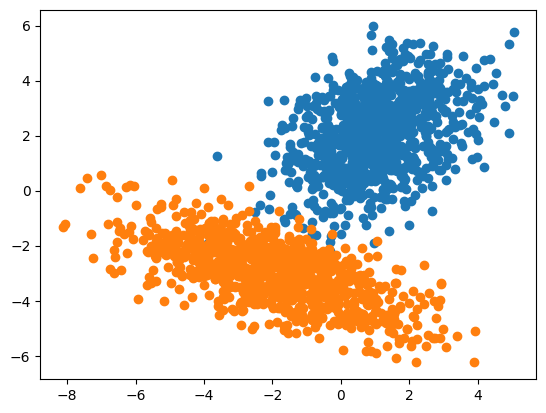

In [ ]:
# Plot the two datasets
plt.scatter(class_1_data[:, 0], class_1_data[:, 1])
plt.scatter(class_2_data[:, 0], class_2_data[:, 1])

In [ ]:
# Calculate the parameters (theta) and use it to make a prediction
theta = torch.matmul(torch.linalg.pinv(all_data), all_labels)
prediction = (torch.matmul(all_data, theta) >= 0.5).type(torch.long)

# Calculate the accuracy of the predictions
accuracy = (prediction == all_labels).sum()/len(prediction)
print("Classifier Accuracy is %.2f%%" % (100 * accuracy.item()))

print(theta.shape)

Classifier Accuracy is 98.15%
torch.Size([3, 1])


RuntimeError: ignored